In [5]:
import pandas as pd
import yfinance as yf

In [6]:
# Download historical data for SPY
spy = yf.download('SPY', '2022-01-01')
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,470.083679,72668200
2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926239,71178700
2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902649,104538900
2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469696,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,458.649231,85111600
...,...,...,...,...,...,...
2023-02-06,409.790009,411.290009,408.100006,409.829987,409.829987,60295300
2023-02-07,408.869995,416.489990,407.570007,415.190002,415.190002,90990700
2023-02-08,413.130005,414.529999,409.929993,410.649994,410.649994,76227500


<AxesSubplot: xlabel='Date'>

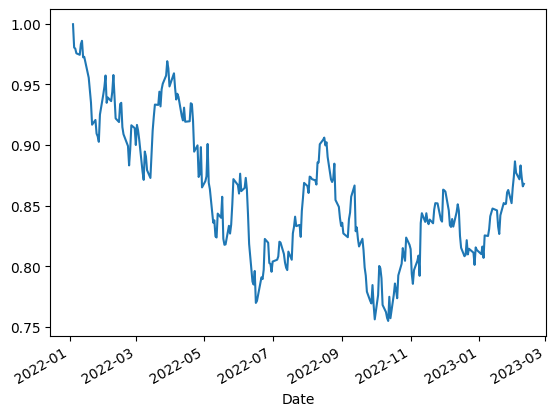

In [7]:
# Calculate the daily returns
spy['returns'] = spy['Adj Close'].pct_change()
spy

# Calculate the cumulative returns
spy['cumulative_returns'] = (1 + spy['returns']).cumprod()
spy

# Plot the cumulative returns
spy['cumulative_returns'].plot()

In [8]:
# Create a moving average and bollinger bands
spy['ma'] = spy['Adj Close'].rolling(20).mean()
spy['upper'] = spy['ma'] + 2 * spy['Adj Close'].rolling(20).std()
spy['lower'] = spy['ma'] - 2 * spy['Adj Close'].rolling(20).std()
spy

,Open,High,Low,Close,Adj Close,Volume,returns,cumulative_returns,ma,upper,lower
Date,,,,,,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,470.083679,72668200,NaN,NaN,NaN,NaN,NaN
2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926239,71178700,-0.000335,0.999665,NaN,NaN,NaN
2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902649,104538900,-0.019202,0.980469,NaN,NaN,NaN
2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469696,86858900,-0.000939,0.979548,NaN,NaN,NaN
2022-01-07,467.950012,469.200012,464.649994,466.089996,458.649231,85111600,-0.003953,0.975676,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,409.790009,411.290009,408.100006,409.829987,409.829987,60295300,-0.006111,0.871823,400.581998,416.669936,384.494059
2023-02-07,408.869995,416.489990,407.570007,415.190002,415.190002,90990700,0.013079,0.883226,401.948499,418.129066,385.767931
2023-02-08,413.130005,414.529999,409.929993,410.649994,410.649994,76227500,-0.010935,0.873568,402.951999,418.646006,387.257992


<AxesSubplot: xlabel='Date'>

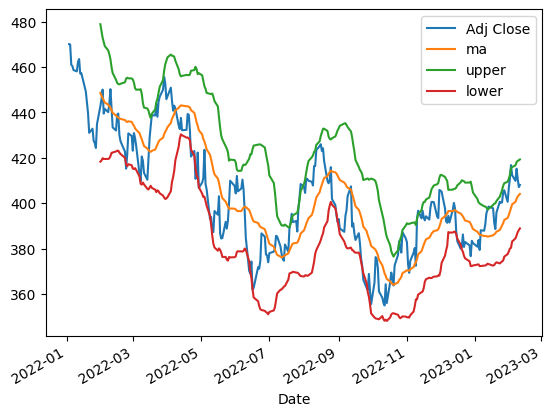

In [9]:
# Plot the moving average and bollinger bands
spy[['Adj Close', 'ma', 'upper', 'lower']].plot()

In [10]:
# Short when the price is above the upper bollinger band
spy['signal'] = 0
spy.loc[spy['Adj Close'] > spy['upper'], 'signal'] = 1

# Long when the price is below the lower bollinger band
spy.loc[spy['Adj Close'] < spy['lower'], 'signal'] = -1
spy

# Replace 0s with NaNs
spy['signal'].replace(0, np.nan, inplace=True)

# Forward fill signal
spy['signal'].fillna(method='ffill', inplace=True)

# Replace Nan with 0s
spy['signal'].replace(np.nan, 0, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Date'>

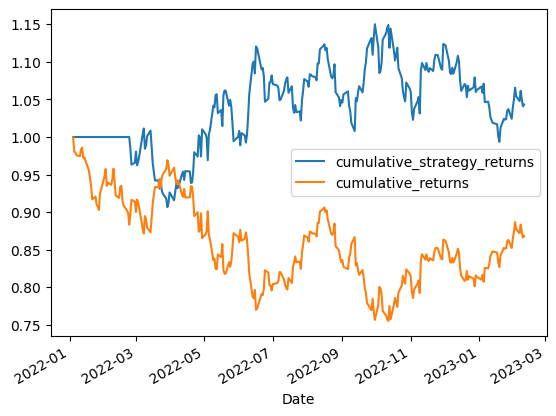

In [11]:
# Calculate the strategy returns
spy['strategy_returns'] = spy['signal'].shift(1) * spy['returns']
spy

# Calculate the cumulative strategy returns
spy['cumulative_strategy_returns'] = (1 + spy['strategy_returns']).cumprod()

# Plot the cumulative strategy and cumulative returns
spy[['cumulative_strategy_returns', 'cumulative_returns']].plot()

In [12]:
def bollinger_band_strategy(ticker, window, std_dev):
    # Download historical data for `ticker`
    data = yf.download(ticker, '2022-01-01')

    # Calculate the daily returns
    data['returns'] = data['Adj Close'].pct_change()

    # Calculate the cumulative returns
    data['cumulative_returns'] = (1 + data['returns']).cumprod()

    # Create a moving average and bollinger bands
    data['ma'] = data['Adj Close'].rolling(window).mean()
    data['upper'] = data['ma'] + std_dev * data['Adj Close'].rolling(window).std()
    data['lower'] = data['ma'] - std_dev * data['Adj Close'].rolling(window).std()

    # Short when the price is above the upper bollinger band
    data['signal'] = 0
    data.loc[data['Adj Close'] > data['upper'], 'signal'] = 1

    # Long when the price is below the lower bollinger band
    data.loc[data['Adj Close'] < data['lower'], 'signal'] = -1

    # Replace 0s with NaNs
    data['signal'].replace(0, np.nan, inplace=True)

    # Forward fill signal
    data['signal'].fillna(method='ffill', inplace=True)

    # Replace Nan with 0s
    data['signal'].replace(np.nan, 0, inplace=True)

    # Calculate the strategy returns
    data['strategy_returns'] = data['signal'].shift(1) * data['returns']

    # Calculate the cumulative strategy returns
    data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod()

    # # Plot the cumulative strategy and cumulative returns
    # data[['cumulative_strategy_returns', 'cumulative_returns']].plot()

    return data

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Date'>

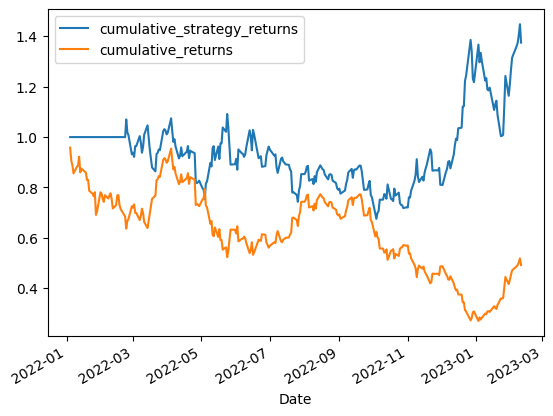

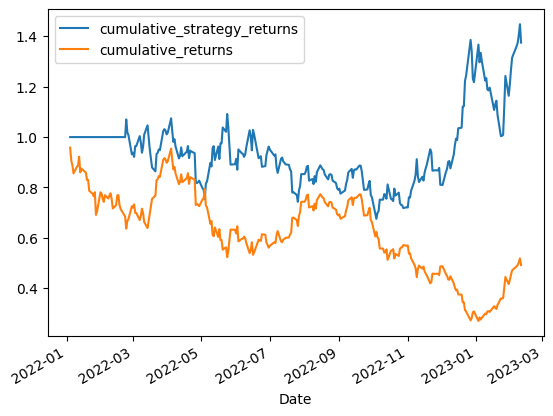

In [15]:
tsla = bollinger_band_strategy('TSLA', 20, 2)

# Plot the cumulative strategy and cumulative returns
tsla[['cumulative_strategy_returns', 'cumulative_returns']].plot()